<a href="https://colab.research.google.com/github/Hussein-Ahmad-94/Tasks/blob/main/ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Fit vs. Complexity in Individual Models`**\

Machine learning tasks are typically:

•**supervised learning tasks:**

 with a data set of labeled examples, where data has been  annotated. For example, in cancer diagnosis, each example will be an individual
patient, with label/annotation “has cancer” or “does not have cancer”. Labels can be  0−1 (binary classification), categorical (multiclass classification) or continuous (regression).

•**unsupervised learning tasks:**

 with a data set of unlabeled examples, where the data lacks annotations. This includes tasks such as grouping examples together by some notion of“similarity” (clustering) or identifying anomalous data that does not fit the expected pattern (anomaly detection).

##### The **Boston Housing** data set is available from **scikit-learn**:

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Feature names for the Boston dataset
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

# Create a DataFrame with feature names and data
boston_df = pd.DataFrame(data, columns=feature_names)

# Add the target variable to the DataFrame
boston_df['MEDV'] = target

# Now, you have a DataFrame with both features and target variables

boston_df.head(10)




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## Decision Tree:

A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It is a tree-like model where each internal node represents a decision based on a feature, each branch represents an outcome of that decision, and each leaf node represents the final decision or prediction.

### Examples on different types of **Decision Trees**:

**Single Depth Decision Tree:**

A single-depth decision tree will only have one split, representing a single decision based on one feature. For instance, a single-depth decision tree might decide to play tennis if the outlook is "Sunny" and not play tennis otherwise.

**Shallow Depth Decision Tree:**

A shallow-depth decision tree will have a few splits but not very deep. It can make more complex decisions based on multiple features. For example, a shallow-depth decision tree might decide to play tennis if the temperature is less than 30°C and the outlook is "Sunny" or "Overcast."

**Deep Depth Decision Tree:**

A deep-depth decision tree can have many splits and create a more complex model. It can capture intricate patterns in the data. For instance, a deep-depth decision tree might consider various combinations of features to make decisions about playing tennis.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, validation_curve

# Extract features and target variable from the DataFrame
features = boston_df.drop(columns=['MEDV'])
target = boston_df['MEDV']

# Create a ShuffleSplit cross-validation object with 5 splits
subsets = ShuffleSplit(n_splits=5, test_size=0.33, random_state=23)

# Create a DecisionTreeRegressor model
model = DecisionTreeRegressor()

# Perform validation curve analysis on the model using different max_depth values
# The validation_curve() function automatically performs cross-validation and calculates train and test scores for each max_depth value.
trn_scores, tst_scores = validation_curve(
    model, features, target, param_name='max_depth', param_range=range(1, 11),
    cv=subsets, scoring='r2'
)

# Calculate the mean train and test scores across the different splits for each max_depth value
mean_train_score = np.mean(trn_scores, axis=1)
mean_test_score = np.mean(tst_scores, axis=1)


**R2 Score for Validation:**

The **R2 score**, also known as the coefficient of determination, is a common evaluation metric for regression models, including decision trees. It represents the proportion of the variance in the target variable (actual values) that can be explained by the model's predictions.

**R2 score** ranges from -∞ to 1, where:

**R2 = 1:** The model perfectly predicts the target variable.

**R2 = 0:** The model's predictions are no better than the mean of the target variable.

**R2 < 0:** The model performs worse than predicting the mean of the target variable.

**Why R2 is used for Decision Trees?**

The **R2 score** is used as a validation metric for decision trees because it provides a simple and intuitive way to assess the model's predictive performance. It quantifies how well the decision tree fits the data and how much of the target variable's variability it captures. A high R2 score indicates a good fit, and a low R2 score indicates poor performance.

By analyzing the **R2 scores** for different depths of the decision tree, you can find the optimal depth that achieves the best balance between underfitting and overfitting. Underfitting occurs when the tree is too simple to capture the underlying patterns, while overfitting occurs when the tree is too complex and memorizes noise in the training data, leading to poor generalization to new data.

The depth of the decision tree is a crucial hyperparameter to control its complexity, and R2 score helps in selecting the appropriate depth that results in the best model performance.

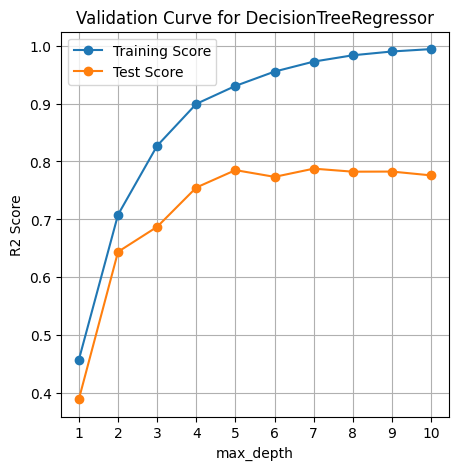

In [ ]:
import matplotlib.pyplot as plt

# Values of max_depth used during validation curve analysis
max_depth_values = range(1, 11)

# Plot the training and test scores
plt.figure(figsize=(5, 5))
plt.plot(max_depth_values, mean_train_score, label='Training Score', marker='o')
plt.plot(max_depth_values, mean_test_score, label='Test Score', marker='o')

# Add labels and title
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.title('Validation Curve for DecisionTreeRegressor')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


## Support Vector Regression (SVR) or Regression with support vector machines

 **Support Vector Regression (SVR)**
  is a supervised machine learning algorithm used for regression tasks. Unlike traditional regression algorithms that aim to minimize the error between predicted and actual values, SVR focuses on finding a hyperplane that best fits the data while allowing some margin (ε) for error.

The main idea behind SVR is to find a hyperplane that includes as many data points as possible within the margin while minimizing the errors of those data points that lie outside the margin.

The margin is defined by two boundaries: the upper boundary (ε) and the lower boundary (-ε). The data points within the margin are considered to have no error, while those outside the margin contribute to the loss function that the model seeks to minimize.

The mathematical formulation of SVR can be represented as follows:

Given a training dataset with features (X) and target values (y):

Objective: Find a hyperplane ** w·X + b = y** that best fits the data while allowing for ε deviations.

Constraints: ** y - (w·X + b) ≤ ε and (w·X + b) - y ≤ ε** for all data points.

Optimization: Minimize the sum of ε deviations and the regularization term
 **(C||w||^2)** to control the margin and prevent overfitting.

SVR can handle non-linear regression tasks by using the "kernel trick." It maps the original feature space into a higher-dimensional space, where the data becomes separable by a hyperplane. Commonly used kernels include Linear, Polynomial, Radial Basis Function (RBF), and Sigmoid kernels.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=23)

# Standardize the features (X) using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 27.559540816850763
R2 Score: 0.6585741802380453


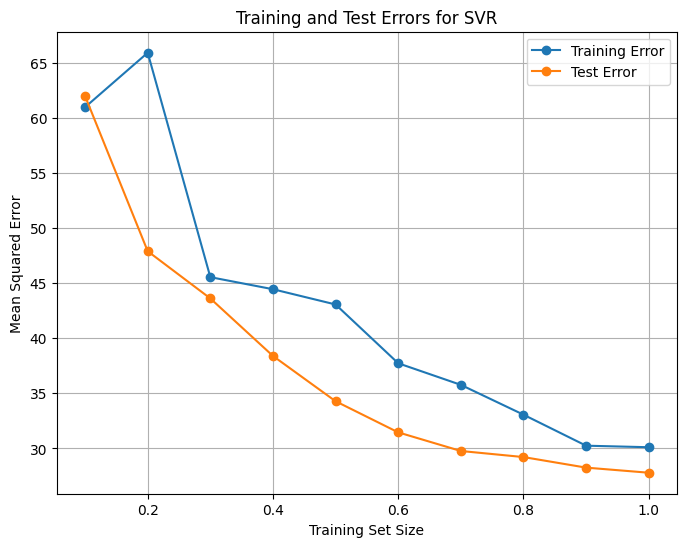

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.33, random_state=42)

# Standardize the features (X) using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an empty list to store training and test errors
train_errors = []
test_errors = []

# Vary the training set size and calculate errors for each size
training_sizes = np.arange(0.1, 1.1, 0.1)
for size in training_sizes:
    train_size = int(size * len(X_train_scaled))
    X_train_subset = X_train_scaled[:train_size]
    y_train_subset = y_train[:train_size]

    # Create an SVR model
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

    # Train the SVR model on the training subset
    model.fit(X_train_subset, y_train_subset)

    # Make predictions on the training and test subsets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate the mean squared error for training and test subsets
    train_mse = mean_squared_error(y_train_subset, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the training and test errors
plt.figure(figsize=(8, 6))
plt.plot(training_sizes, train_errors, label='Training Error', marker='o')
plt.plot(training_sizes, test_errors, label='Test Error', marker='o')

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors for SVR')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

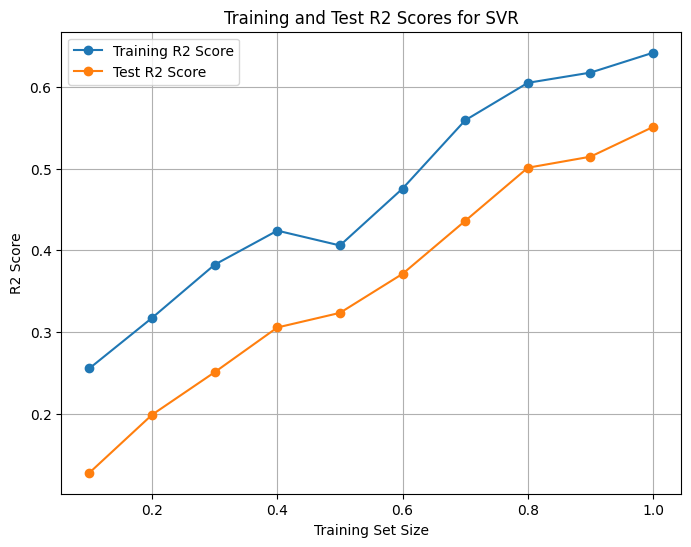

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.33, random_state=52)

# Standardize the features (X) using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an empty list to store training and test R2 scores
train_r2_scores = []
test_r2_scores = []

# Vary the training set size and calculate R2 scores for each size
training_sizes = np.arange(0.1, 1.1, 0.1)
for size in training_sizes:
    train_size = int(size * len(X_train_scaled))
    X_train_subset = X_train_scaled[:train_size]
    y_train_subset = y_train[:train_size]

    # Create an SVR model
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

    # Train the SVR model on the training subset
    model.fit(X_train_subset, y_train_subset)

    # Make predictions on the training and test subsets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate the R2 scores for training and test subsets
    train_r2 = r2_score(y_train_subset, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Plot the training and test R2 scores
plt.figure(figsize=(8, 6))
plt.plot(training_sizes, train_r2_scores, label='Training R2 Score', marker='o')
plt.plot(training_sizes, test_r2_scores, label='Test R2 Score', marker='o')

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.title('Training and Test R2 Scores for SVR')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

* what if training errors is lower than test error and r2 for training is greater than that for test, how we can interpret it ?!?! *

When the training error is lower than the test error, and the R2 score for the training set is greater than that for the test set, it typically indicates that the model is overfitting the training data.

Overfitting occurs when a machine learning model learns the noise and random fluctuations in the training data instead of the underlying patterns. As a result, the model performs very well on the training data but fails to generalize to unseen data (i.e., the test data).

Here's how we can interpret this situation:

Training Error Lower Than Test Error: The lower training error suggests that the model is performing very well on the training data. It can fit the training data closely and capture the noise, resulting in a small error for the training set.

R2 for Training Greater Than Test R2: A higher R2 score for the training set indicates that the model can explain a larger proportion of the variance in the training data. It fits the training data very well, which might be a sign of overfitting.

Interpretation: The combination of lower training error and higher R2 for the training set suggests that the model is "memorizing" the training data and might not be capturing the underlying patterns in the data. As a result, the model fails to generalize to new, unseen data, leading to higher errors and lower R2 score on the test set.

How to Address Overfitting:

To address overfitting and improve the model's generalization, you can consider the following strategies:

Regularization: Introduce regularization techniques like L1 or L2 regularization (for linear models) or adjust the C parameter (for SVM) to control the complexity of the model and prevent it from fitting the noise.

Feature Selection/Engineering: Carefully select relevant features or engineer new features that are more informative and relevant to the target variable. Removing irrelevant or noisy features can help the model focus on the important patterns.

Cross-Validation: Use cross-validation techniques to assess the model's performance on different subsets of the data. This helps to identify overfitting and ensures that the model generalizes well.

Ensemble Methods: Consider using ensemble methods like Random Forest or Gradient Boosting, which combine multiple models to improve generalization.

Hyperparameter Tuning: Fine-tune the hyperparameters of the model using techniques like Grid Search or Random Search to find the best combination that prevents overfitting.

By implementing these strategies, you can mitigate overfitting and create a more robust model that performs well on both the training and test data.

In [ ]:
from sklearn.svm import SVR
model = SVR(degree=3)
trn_scores, tst_scores = validation_curve(model, features, target.ravel(),
param_name='C',
 param_range=np.logspace(-2,4,7),
 cv=subsets, scoring='r2')
mean_train_score = np.mean(trn_scores, axis=1)
mean_test_score = np.mean(tst_scores, axis=1)

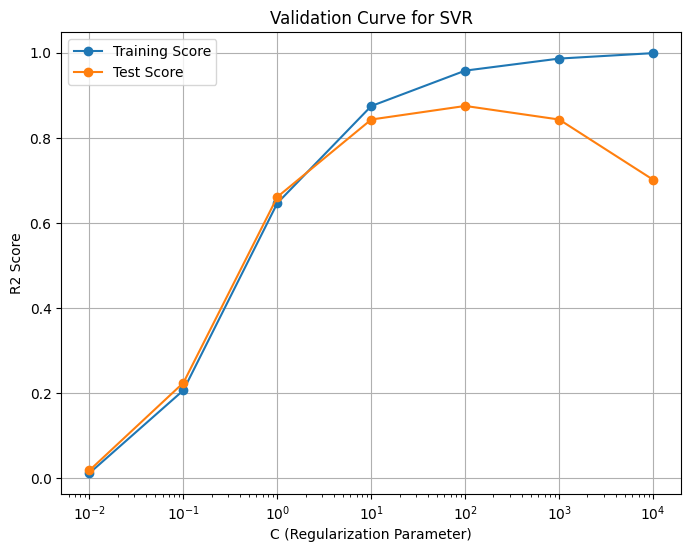

In [ ]:
# Standardize the features (X) using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Create a ShuffleSplit cross-validation object with 5 splits
subsets = ShuffleSplit(n_splits=5, test_size=0.33, random_state=23)

# Create an SVR model with a polynomial kernel of degree 3
model = SVR(degree=3)

# Perform validation curve analysis
trn_scores, tst_scores = validation_curve(
    model, X, target.ravel(),
    param_name='C',
    param_range=np.logspace(-2, 4, 7),
    cv=subsets, scoring='r2'
)

# Calculate the mean train and test scores across different splits for each value of C
mean_train_score = np.mean(trn_scores, axis=1)
mean_test_score = np.mean(tst_scores, axis=1)

# Visualize the validation curve
plt.figure(figsize=(8, 6))
plt.plot(np.logspace(-2, 4, 7), mean_train_score, label='Training Score', marker='o')
plt.plot(np.logspace(-2, 4, 7), mean_test_score, label='Test Score', marker='o')

# Add labels and title
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('R2 Score')
plt.title('Validation Curve for SVR')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

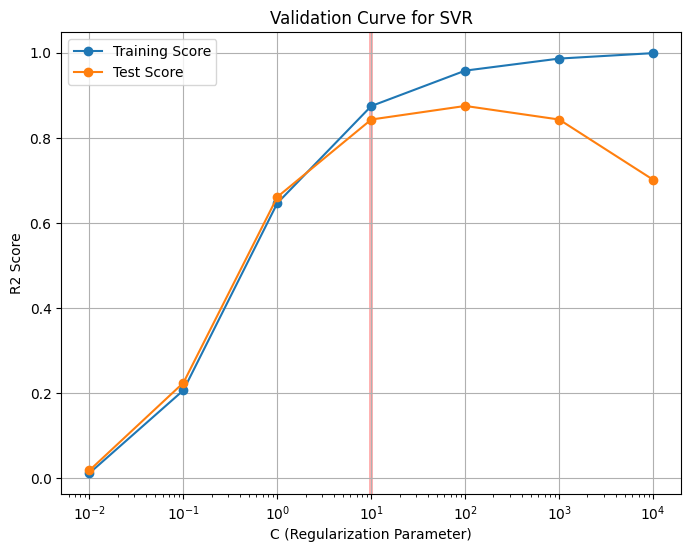

In [ ]:
# Standardize the features (X) using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Create a ShuffleSplit cross-validation object with 5 splits
subsets = ShuffleSplit(n_splits=5, test_size=0.33, random_state=23)

# Create an SVR model with a polynomial kernel of degree 3
model = SVR(degree=3)

# Perform validation curve analysis
trn_scores, tst_scores = validation_curve(
    model, X, target.ravel(),
    param_name='C',
    param_range=np.logspace(-2, 4, 7),
    cv=subsets, scoring='r2'
)

# Calculate the mean train and test scores across different splits for each value of C
mean_train_score = np.mean(trn_scores, axis=1)
mean_test_score = np.mean(tst_scores, axis=1)

# Visualize the validation curve
plt.figure(figsize=(8, 6))
plt.plot(np.logspace(-2, 4, 7), mean_train_score, label='Training Score', marker='o')
plt.plot(np.logspace(-2, 4, 7), mean_test_score, label='Test Score', marker='o')

# Add labels and title
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('R2 Score')
plt.title('Validation Curve for SVR')
plt.grid(True)
plt.legend()

# Add a square grid for a specific C value (e.g., C=10)
#specific_c_value = 10
#plt.axvline(x=specific_c_value, color='gray', linestyle='--', linewidth=1)

specific_c_value = 10
plt.axvspan(specific_c_value - 0.5, specific_c_value + 0.5, facecolor='red', alpha=0.3, label='The Best Regularization Value')


# Show the plot
plt.show()

**The model with the best fit on the training set is not necessarily the best model for predictions when deployed in the real world.**

## Ensembled Models:

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor


X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.33, random_state=60)


#A: initialize hyperparameters of each individual base estimator
estimators = {'krr': KernelRidge(kernel='rbf', gamma=0.1),
 'svr': SVR(gamma=0.1),
 'dtr': DecisionTreeRegressor(max_depth=8),
 'knn': KNeighborsRegressor(n_neighbors=3),
 'gpr': GaussianProcessRegressor(alpha= 1e-1),
 'mlp': MLPRegressor(alpha=25, max_iter=1000)}

#B: train the individual base estimators
for name, estimator in estimators.items():
 estimator = estimator.fit(X_train, y_train)

 n_estimators, n_samples = len(estimators), X_test.shape[0]
y_individual = np.zeros((n_samples, n_estimators))

for i, (model, estimator) in enumerate(estimators.items()): #A
 y_individual[:, i] = estimator.predict(X_test) #B

#C:  aggregate (average) individual predictions

y_final = np.mean(y_individual, axis=1) #C


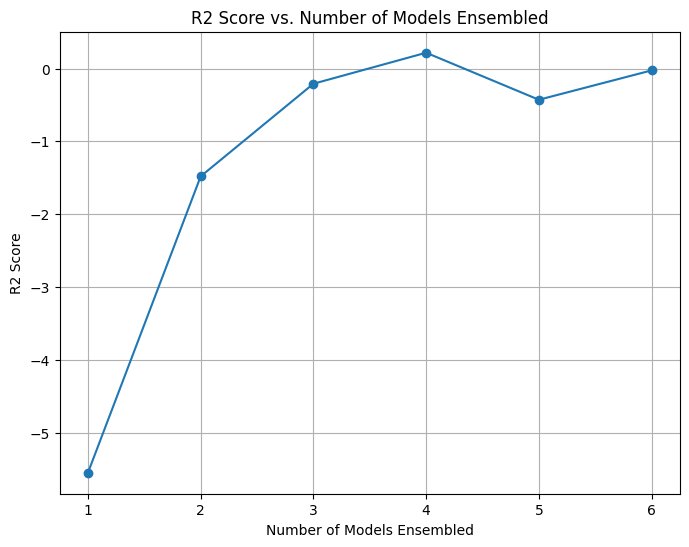

In [ ]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming features and target are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=60)

# Initialize hyperparameters of each individual base estimator
estimators = {
    'krr': KernelRidge(kernel='rbf', gamma=0.1),
    'svr': SVR(gamma=0.1),
    'dtr': DecisionTreeRegressor(max_depth=8),
    'knn': KNeighborsRegressor(n_neighbors=3),
    'gpr': GaussianProcessRegressor(alpha=1e-1),
    'mlp': MLPRegressor(alpha=25, max_iter=1000)
}

# Train the individual base estimators
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)

# Aggregate (average) individual predictions
n_estimators = len(estimators)
n_samples = X_test.shape[0]
y_individual = np.zeros((n_samples, n_estimators))

for i, (model, estimator) in enumerate(estimators.items()):
    y_individual[:, i] = estimator.predict(X_test)

y_final = np.mean(y_individual, axis=1)

# Compute R2 scores for each ensemble size
r2_scores = []
for i in range(1, n_estimators + 1):
    y_ensemble = np.mean(y_individual[:, :i], axis=1)
    r2 = 1 - ((y_test - y_ensemble) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
    r2_scores.append(r2)

# Plot the coefficient of determination (R2) versus the number of models ensembled
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_estimators + 1), r2_scores, marker='o')
plt.xlabel('Number of Models Ensembled')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Number of Models Ensembled')
plt.grid(True)
plt.show()

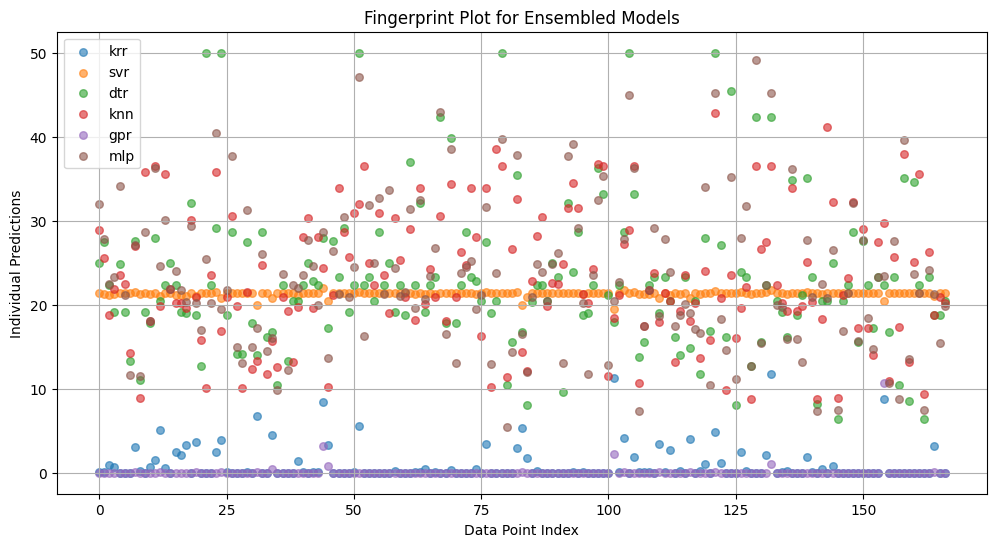

In [ ]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming features and target are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=60)

# Initialize hyperparameters of each individual base estimator
estimators = {
    'krr': KernelRidge(kernel='rbf', gamma=0.1),
    'svr': SVR(gamma=0.1),
    'dtr': DecisionTreeRegressor(max_depth=8),
    'knn': KNeighborsRegressor(n_neighbors=3),
    'gpr': GaussianProcessRegressor(alpha=1e-1),
    'mlp': MLPRegressor(alpha=25, max_iter=1000)
}

# Train the individual base estimators
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)

# Aggregate (average) individual predictions
n_estimators = len(estimators)
n_samples = X_test.shape[0]
y_individual = np.zeros((n_samples, n_estimators))

for i, (model, estimator) in enumerate(estimators.items()):
    y_individual[:, i] = estimator.predict(X_test)

# Plot fingerprint plot for individual predictions of ensembled models
plt.figure(figsize=(12, 6))
for i, (model, _) in enumerate(estimators.items()):
    plt.scatter(range(n_samples), y_individual[:, i], label=model, alpha=0.6, marker='o', s=30)

plt.xlabel('Data Point Index')
plt.ylabel('Individual Predictions')
plt.title('Fingerprint Plot for Ensembled Models')
plt.legend()
plt.grid(True)
plt.show()


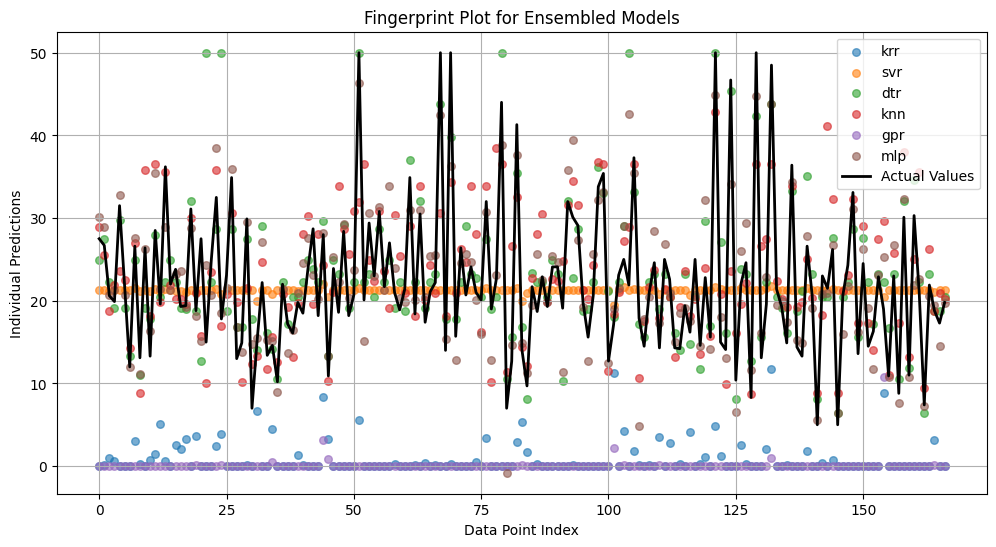

In [ ]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming features and target are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=60)

# Initialize hyperparameters of each individual base estimator
estimators = {
    'krr': KernelRidge(kernel='rbf', gamma=0.1),
    'svr': SVR(gamma=0.1),
    'dtr': DecisionTreeRegressor(max_depth=8),
    'knn': KNeighborsRegressor(n_neighbors=3),
    'gpr': GaussianProcessRegressor(alpha=1e-1),
    'mlp': MLPRegressor(alpha=25, max_iter=1000)
}

# Train the individual base estimators
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)

# Aggregate (average) individual predictions
n_estimators = len(estimators)
n_samples = X_test.shape[0]
y_individual = np.zeros((n_samples, n_estimators))

for i, (model, estimator) in enumerate(estimators.items()):
    y_individual[:, i] = estimator.predict(X_test)

# Plot fingerprint plot for individual predictions of ensembled models
plt.figure(figsize=(12, 6))
for i, (model, _) in enumerate(estimators.items()):
    plt.scatter(range(n_samples), y_individual[:, i], label=model, alpha=0.6, marker='o', s=30)

# Add a line for actual values from the test set
plt.plot(range(n_samples), y_test, label='Actual Values', color='black', linestyle='-', linewidth=2)

plt.xlabel('Data Point Index')
plt.ylabel('Individual Predictions')
plt.title('Fingerprint Plot for Ensembled Models')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


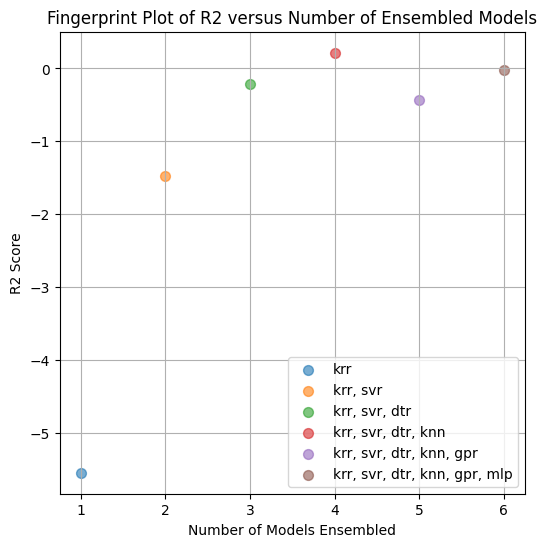

In [ ]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming features and target are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=60)

# Initialize hyperparameters of each individual base estimator
estimators = {
    'krr': KernelRidge(kernel='rbf', gamma=0.1),
    'svr': SVR(gamma=0.1),
    'dtr': DecisionTreeRegressor(max_depth=8),
    'knn': KNeighborsRegressor(n_neighbors=3),
    'gpr': GaussianProcessRegressor(alpha=1e-1),
    'mlp': MLPRegressor(alpha=25, max_iter=1000)
}

# Train the individual base estimators
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)

# Aggregate (average) individual predictions
n_estimators = len(estimators)
n_samples = X_test.shape[0]
y_individual = np.zeros((n_samples, n_estimators))

for i, (model, estimator) in enumerate(estimators.items()):
    y_individual[:, i] = estimator.predict(X_test)

# Compute R2 scores for each ensemble size
r2_scores = []
ensemble_models = []
for i in range(1, n_estimators + 1):
    y_ensemble = np.mean(y_individual[:, :i], axis=1)
    r2 = 1 - ((y_test - y_ensemble) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
    r2_scores.append(r2)
    ensemble_models.append(list(estimators.keys())[:i])

# Plot fingerprint plot of R2 versus the number of ensembled models
plt.figure(figsize=(6, 6))
for i, model_names in enumerate(ensemble_models):
    plt.scatter(i + 1, r2_scores[i], label=', '.join(model_names), alpha=0.6, marker='o', s=50)

plt.xlabel('Number of Models Ensembled')
plt.ylabel('R2 Score')
plt.title('Fingerprint Plot of R2 versus Number of Ensembled Models')
plt.xticks(range(1, n_estimators + 1))
plt.legend()
plt.grid(True)
plt.show()


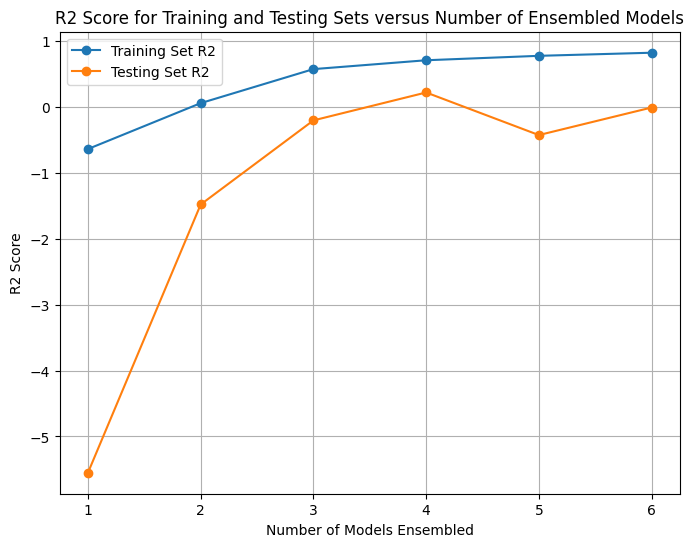

In [ ]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming features and target are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=60)

# Initialize hyperparameters of each individual base estimator
estimators = {
    'krr': KernelRidge(kernel='rbf', gamma=0.1),
    'svr': SVR(gamma=0.1),
    'dtr': DecisionTreeRegressor(max_depth=8),
    'knn': KNeighborsRegressor(n_neighbors=3),
    'gpr': GaussianProcessRegressor(alpha=1e-1),
    'mlp': MLPRegressor(alpha=25, max_iter=1000)
}

# Train the individual base estimators
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)

# Aggregate (average) individual predictions
n_estimators = len(estimators)
n_samples_train = X_train.shape[0]
n_samples_test = X_test.shape[0]
y_individual_train = np.zeros((n_samples_train, n_estimators))
y_individual_test = np.zeros((n_samples_test, n_estimators))

for i, (model, estimator) in enumerate(estimators.items()):
    y_individual_train[:, i] = estimator.predict(X_train)
    y_individual_test[:, i] = estimator.predict(X_test)

# List to store R2 scores for training and testing sets for different ensemble sizes
train_r2_scores = []
test_r2_scores = []

# Loop over different ensemble sizes (1 to 6)
for ensemble_size in range(1, n_estimators + 1):
    y_ensemble_train = np.mean(y_individual_train[:, :ensemble_size], axis=1)
    y_ensemble_test = np.mean(y_individual_test[:, :ensemble_size], axis=1)

    train_r2 = 1 - ((y_train - y_ensemble_train) ** 2).sum() / ((y_train - y_train.mean()) ** 2).sum()
    test_r2 = 1 - ((y_test - y_ensemble_test) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Plot R2 scores for training and testing sets versus the number of ensembled models
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_estimators + 1), train_r2_scores, marker='o', label='Training Set R2')
plt.plot(range(1, n_estimators + 1), test_r2_scores, marker='o', label='Testing Set R2')
plt.xlabel('Number of Models Ensembled')
plt.ylabel('R2 Score')
plt.title('R2 Score for Training and Testing Sets versus Number of Ensembled Models')
plt.grid(True)
plt.legend()
plt.show()


The ensembled increase from -5 to reach zero while on the single predictive model alone , it give 60 % and more ???


If the ensembled R2 score decreases from -5 to zero while the single predictive model alone gives 60% or more R2, it suggests that the ensembling process is causing significant deterioration in the predictive performance. This scenario can occur due to a variety of reasons, some of which I will outline below:

Incorrect Ensembling Technique: The ensembling technique used (e.g., averaging, weighted averaging, or boosting) might not be suitable for the specific models or data at hand. Certain ensembling methods could amplify the errors of individual models and lead to a drop in performance.

Model Incompatibility: Some models might not be compatible with the chosen ensembling technique. Combining models that are inherently contradictory or have different underlying assumptions can lead to suboptimal results.

Overfitting: If the ensembling process involves combining models that overfit the training data, it can lead to poor generalization and a significant drop in performance on the test set.

Lack of Diversity: The ensemble might lack diversity among the base models, resulting in redundant predictions that do not provide complementary information.

Hyperparameter Tuning: The hyperparameters of the individual models or the ensembling process may not be adequately tuned, leading to suboptimal results.

To address these issues and improve the performance of the ensembled models, consider the following steps:

Review Ensembling Technique: Explore different ensembling techniques and see which one works best for your models and data. For example, try bagging, boosting, or stacking, and assess their impact on performance.

Model Selection: Reevaluate the choice of models in the ensemble. Focus on models that provide diverse predictions and are more compatible with the ensembling approach.

Hyperparameter Tuning: Perform a thorough hyperparameter tuning for both the individual models and the ensembling technique to optimize their performance.

Data Preprocessing: Ensure that the data preprocessing and feature engineering steps are appropriate for the models and the ensembling process.

Ensemble Size: Experiment with different ensemble sizes to find the optimal number of models that maximizes performance.

Model Evaluation: Carefully assess the performance of the individual base models to identify any issues, such as overfitting, that may be contributing to the drop in performance.

By addressing these factors, you can potentially improve the ensembled models' performance and achieve R2 scores closer to or better than the single predictive model. It is essential to thoroughly evaluate the individual components and the ensembling process to understand the cause of the performance drop and take appropriate steps for improvement.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


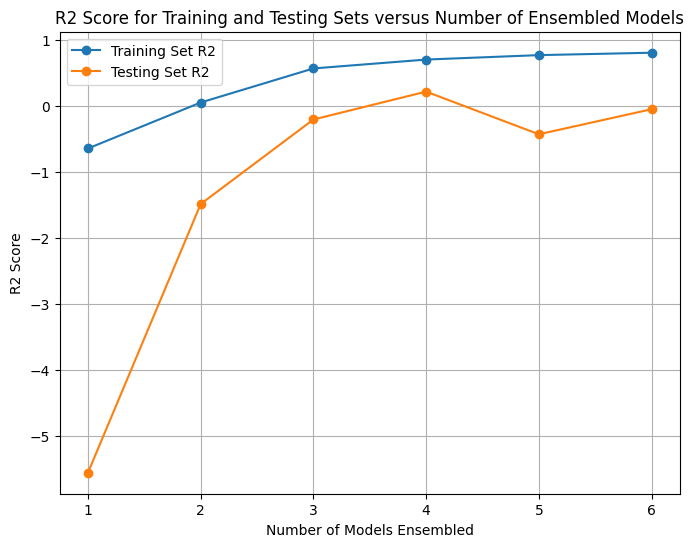

In [ ]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming features and target are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=60)

# Initialize hyperparameters of each individual base estimator
estimators = {
    'krr': KernelRidge(kernel='rbf', gamma=0.1),
    'svr': SVR(gamma=0.1),
    'dtr': DecisionTreeRegressor(max_depth=8),
    'knn': KNeighborsRegressor(n_neighbors=3),
    'gpr': GaussianProcessRegressor(alpha=1e-1),
    'mlp': MLPRegressor(alpha=25, max_iter=1000)
}

# Train the individual base estimators
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)

# Aggregate (average) individual predictions
n_estimators = len(estimators)
n_samples_train = X_train.shape[0]
n_samples_test = X_test.shape[0]
y_individual_train = np.zeros((n_samples_train, n_estimators))
y_individual_test = np.zeros((n_samples_test, n_estimators))

for i, (model, estimator) in enumerate(estimators.items()):
    y_individual_train[:, i] = estimator.predict(X_train)
    y_individual_test[:, i] = estimator.predict(X_test)

# List to store R2 scores for training and testing sets for different ensemble sizes
train_r2_scores = []
test_r2_scores = []

# Loop over different ensemble sizes (1 to 6)
for ensemble_size in range(1, n_estimators + 1):
    y_ensemble_train = np.mean(y_individual_train[:, :ensemble_size], axis=1)
    y_ensemble_test = np.mean(y_individual_test[:, :ensemble_size], axis=1)

    # Calculate R2 scores using the correct formula
    residual_train = y_train - y_ensemble_train
    total_variance_train = y_train - y_train.mean()
    train_r2 = 1 - (np.sum(residual_train**2) / np.sum(total_variance_train**2))

    residual_test = y_test - y_ensemble_test
    total_variance_test = y_test - y_test.mean()
    test_r2 = 1 - (np.sum(residual_test**2) / np.sum(total_variance_test**2))

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Plot R2 scores for training and testing sets versus the number of ensembled models
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_estimators + 1), train_r2_scores, marker='o', label='Training Set R2')
plt.plot(range(1, n_estimators + 1), test_r2_scores, marker='o', label='Testing Set R2')
plt.xlabel('Number of Models Ensembled')
plt.ylabel('R2 Score')
plt.title('R2 Score for Training and Testing Sets versus Number of Ensembled Models')
plt.grid(True)
plt.legend()
plt.show()


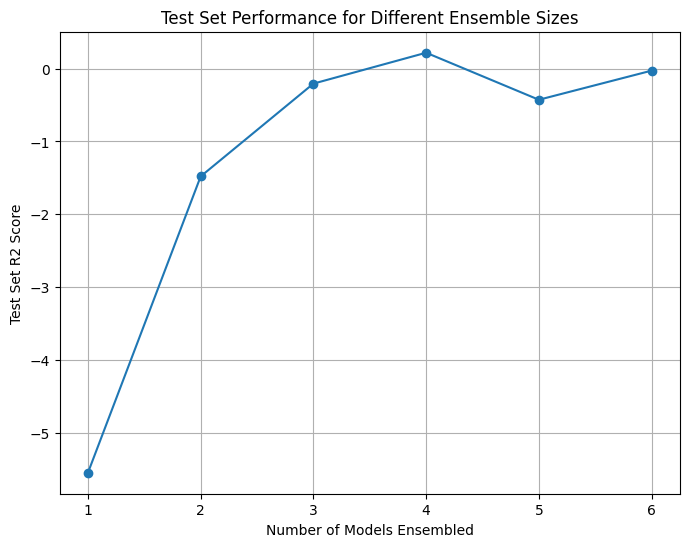

In [ ]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming features and target are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=60)

# Initialize hyperparameters of each individual base estimator
estimators = {
    'krr': KernelRidge(kernel='rbf', gamma=0.1),
    'svr': SVR(gamma=0.1),
    'dtr': DecisionTreeRegressor(max_depth=8),
    'knn': KNeighborsRegressor(n_neighbors=3),
    'gpr': GaussianProcessRegressor(alpha=1e-1),
    'mlp': MLPRegressor(alpha=25, max_iter=1000)
}

# Train the individual base estimators
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)

# Aggregate (average) individual predictions
n_estimators = len(estimators)
n_samples = X_test.shape[0]
y_individual = np.zeros((n_samples, n_estimators))

for i, (model, estimator) in enumerate(estimators.items()):
    y_individual[:, i] = estimator.predict(X_test)

# List to store test set performances for different ensemble sizes
test_set_performances = []

# Loop over different ensemble sizes (1 to 6)
for ensemble_size in range(1, n_estimators + 1):
    y_ensemble = np.mean(y_individual[:, :ensemble_size], axis=1)
    r2 = 1 - ((y_test - y_ensemble) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
    test_set_performances.append(r2)

# Plot test set performances for different ensemble sizes
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_estimators + 1), test_set_performances, marker='o')
plt.xlabel('Number of Models Ensembled')
plt.ylabel('Test Set R2 Score')
plt.title('Test Set Performance for Different Ensemble Sizes')
plt.grid(True)
plt.show()


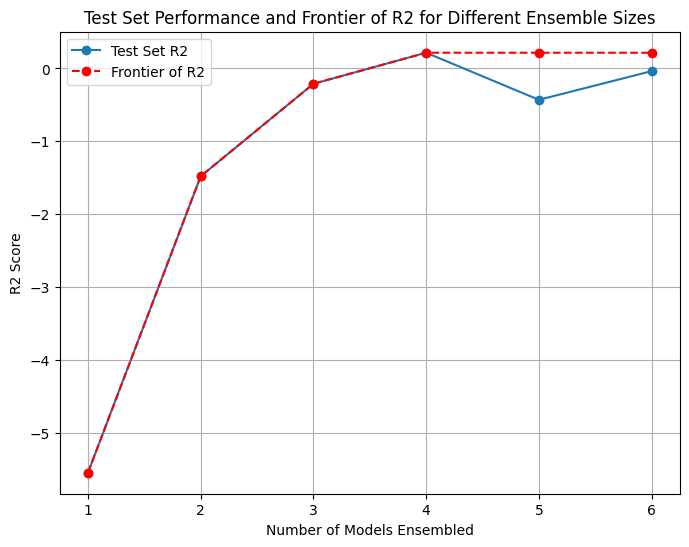

In [ ]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming features and target are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=60)

# Initialize hyperparameters of each individual base estimator
estimators = {
    'krr': KernelRidge(kernel='rbf', gamma=0.1),
    'svr': SVR(gamma=0.1),
    'dtr': DecisionTreeRegressor(max_depth=8),
    'knn': KNeighborsRegressor(n_neighbors=3),
    'gpr': GaussianProcessRegressor(alpha=1e-1),
    'mlp': MLPRegressor(alpha=25, max_iter=1000)
}

# Train the individual base estimators
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)

# Aggregate (average) individual predictions
n_estimators = len(estimators)
n_samples = X_test.shape[0]
y_individual = np.zeros((n_samples, n_estimators))

for i, (model, estimator) in enumerate(estimators.items()):
    y_individual[:, i] = estimator.predict(X_test)

# List to store test set performances for different ensemble sizes
test_set_performances = []

# Loop over different ensemble sizes (1 to 6)
for ensemble_size in range(1, n_estimators + 1):
    y_ensemble = np.mean(y_individual[:, :ensemble_size], axis=1)
    r2 = 1 - ((y_test - y_ensemble) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
    test_set_performances.append(r2)

# Compute the frontier of R2 (maximum R2 achieved with increasing ensemble size)
frontier_r2 = np.maximum.accumulate(test_set_performances)

# Plot test set performances and the frontier of R2 for different ensemble sizes
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_estimators + 1), test_set_performances, marker='o', label='Test Set R2')
plt.plot(range(1, n_estimators + 1), frontier_r2, marker='o', linestyle='--', color='red', label='Frontier of R2')
plt.xlabel('Number of Models Ensembled')
plt.ylabel('R2 Score')
plt.title('Test Set Performance and Frontier of R2 for Different Ensemble Sizes')
plt.grid(True)
plt.legend()
plt.show()
